# Global Income Group Classification based on Global Development Indicators

## Introduction
Economic development is key driver of global well-being, but countries differ based on their levels of prosperity. Policymakers, politicians, financial institutions, and people interested in macro economics need to understand which countries are stagnating in lower income levels and which are progressing toward higher income categories. If we are able to identify patterns amongst countries, higher income countries can use these insights to direct aid, investment, and policy support toward lower income countries to promote global development and reduce inequality.

## The Data
The data used in this project is from [kaggle](https://www.kaggle.com/datasets/michaelmatta0/global-development-indicators-2000-2020?resource=download). This dataset includes global indicators from 2000 to 2020 with information covering economic, environmental, and social dimensions for over 190 countries (GDP, inflation rate, unemployment rate, CO2 emissions, renewable energy usage, life expectancy, school enrollment, healthcare capacity, and various development indices). In total, there are 47 key features in this dataset with over 5500 rows. 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")
df

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,...,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,...,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,...,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,...,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,...,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,2016,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,2.054868e+10,14030338.0,1464.588957,-1.543670,...,NaN,16,16,0,0.370373,0.179093,0.421578,0.5,0.375164,30.424141
5552,2017,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.758489e+10,14236599.0,1235.189032,0.893962,...,NaN,17,17,0,0.377994,0.177640,0.451950,0.5,0.365426,30.831303
5553,2018,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.811554e+10,14438812.0,1254.642265,10.618866,...,NaN,18,18,0,0.386741,0.183261,0.423016,0.5,0.343432,31.485225
5554,2019,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.928429e+10,14645473.0,1316.740657,255.304991,...,NaN,19,19,0,0.389866,0.386967,0.425841,0.5,0.513916,23.194054


In this dataset, our target value/column is **income_group**.

## Data Preprocessing

As you can see from the table above, there are many rows with null values. I will check the amount of null values for the entire dataset because missing data can lead to misleading results.

In [67]:
print(df.shape)
df.isna().sum()

(5556, 47)


year                                      0
country_code                              0
country_name                              0
region                                 1008
income_group                           1029
currency_unit                          1008
gdp_usd                                 224
population                                0
gdp_per_capita                          224
inflation_rate                          810
unemployment_rate                       630
fdi_pct_gdp                             545
co2_emissions_kt                       1022
energy_use_per_capita                  2621
renewable_energy_pct                    748
forest_area_pct                         113
electricity_access_pct                  401
life_expectancy                         600
child_mortality                         504
school_enrollment_secondary            1800
health_expenditure_pct_gdp              870
hospital_beds_per_1000                 2873
physicians_per_1000             

There is a ton of null values in this dataset. To continue, I need to decide which columns are viable to drop or if missing values should be filled in. 

### Dropping Columns / Rows

Since the target value is **income_group**, I need to remove rows where **income_group** is missing (I can't train and test without the labels).

In [68]:
df_dropped = df.dropna(subset=["income_group"])

Next, I can drop columns that don't help with prediction:

Identifier not a feature
* country_name
* country_code
* currency_unit

I don't need to predict across time, these columns just add noise
* year 
* years_since_2000 
* years_since_century

Since GDP-related features are a sure-fire way of predicting a countries income group, I decided to remove these columns because it shows health, education, environment, and digital indicators can explain income groups beyond just "rich vs poor."
* gdp_usd
* gdp_per_capita
* calculated_gdp_per_capita
* real_economic_growth_indicator
* co2_intensity_per_million_gdp


In [69]:
cols_to_drop = [
    "country_name",
    "country_code",
    "currency_unit",
    "year",
    "years_since_2000",
    "years_since_century",
    "gdp_usd",
    "gdp_per_capita",
    "calculated_gdp_per_capita",
    "real_economic_growth_indicator",
    "co2_intensity_per_million_gdp"
]

df_dropped = df_dropped.drop(columns=cols_to_drop)
print(df_dropped.shape)

(4527, 36)


Now that I have dropped all the necessary columns and rows, the data preprocessing step is done!

## Data Understanding and Visualization

To understand the data, I need to create visualizations (plot/graphs) that reveal the distribution of income groups and uncover patterns or trends that may influence a country’s classification.

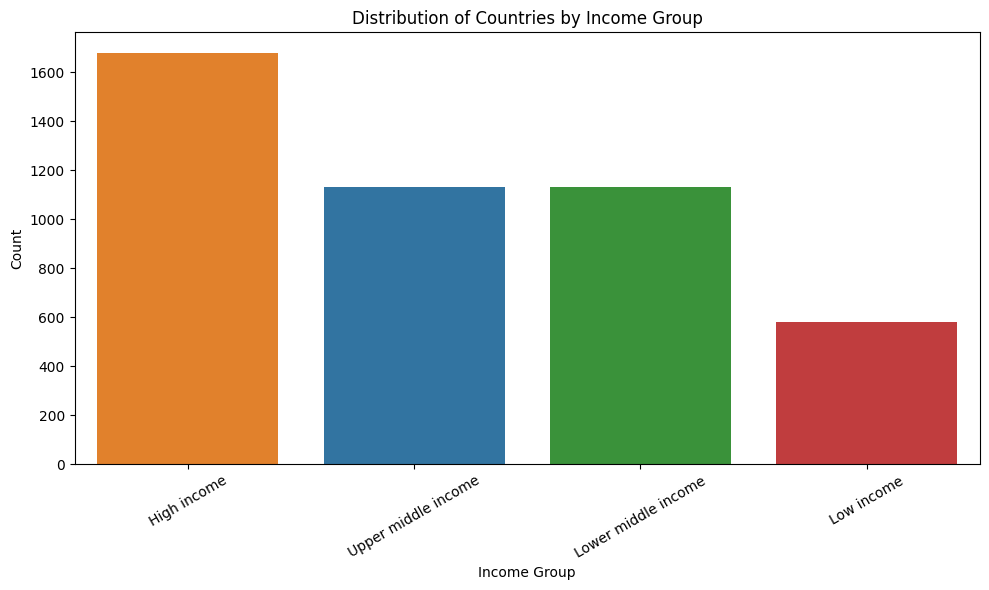

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_dropped,
    x="income_group",
    hue="income_group",
    order=df_dropped["income_group"].value_counts().index,
    
)
plt.title("Distribution of Countries by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

From this countplot, we can see that more than 1600 countries are classified as "High Income", making it the largest group. Both “Upper Middle Income” and “Lower Middle Income” categories have around 1,100 records each, while the “Low Income” category is the smallest group with about 600 records. This distribution shows a noticable class imbalance, with high-income countries being overrepresented compared to low-income countries.

Next lets take a look at the number of numeric and categorical features there are left in this dataset.

In [71]:
num_features = df_dropped.select_dtypes(include=["int64", "float64"]).columns
print("Number of numeric features:", len(num_features))

cat_features = df_dropped.select_dtypes(include=["object", "category"]).columns
print("Number of categorical features:", len(cat_features))

print("\nNumeric features:\n", num_features.tolist())
print("\nCategorical features:\n", cat_features.tolist())

Number of numeric features: 34
Number of categorical features: 2

Numeric features:
 ['population', 'inflation_rate', 'unemployment_rate', 'fdi_pct_gdp', 'co2_emissions_kt', 'energy_use_per_capita', 'renewable_energy_pct', 'forest_area_pct', 'electricity_access_pct', 'life_expectancy', 'child_mortality', 'school_enrollment_secondary', 'health_expenditure_pct_gdp', 'hospital_beds_per_1000', 'physicians_per_1000', 'internet_usage_pct', 'mobile_subscriptions_per_100', 'econ_opportunity_index', 'co2_emissions_per_capita_tons', 'green_transition_score', 'ecological_preservation_index', 'renewable_energy_efficiency', 'human_development_composite', 'healthcare_capacity_index', 'digital_connectivity_index', 'health_development_ratio', 'education_health_ratio', 'is_pandemic_period', 'human_development_index', 'climate_vulnerability_index', 'digital_readiness_score', 'governance_quality_index', 'global_resilience_score', 'global_development_resilience_index']

Categorical features:
 ['region', '

There seems to be one categorical feature left other than our target feature. **Region** has potential to be useful for my machine learning model that I will choose later because it may be able to capture geopolitical/economical similariities. It may add predictive power, but it can also add bias. For now, I will keep **region** and use One-Hot Encoding so that it can be represented numerically without false ordering. 

## Modeling

For this project, I plan to use a Random Forest classifier because it build multiple deicions trees and combines their results to create more accurate predictions. I also believe it is a good fit for the type of data in this dataset.

